In [1]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/goradbj1/dataairevolution/main/datasets/cars-price.csv'
data = pd.read_csv(url, index_col = 0)

# Display the first few rows of the dataset
data

,Age,Kms_Driven,Engine_Size,Price
0,13,5394,1894,5.956960e+05
1,6,7046,2871,1.225440e+06
2,1,54082,1533,7.814882e+05
3,4,26498,2825,1.141364e+06
4,12,107200,1253,5.000000e+04
...,...,...,...,...
199995,7,148940,2921,4.068334e+05
199996,8,30904,2078,7.495150e+05
199997,1,12175,1469,1.075274e+06
199998,6,32518,2440,9.289868e+05


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Age          200000 non-null  int64  
 1   Kms_Driven   200000 non-null  int64  
 2   Engine_Size  200000 non-null  int64  
 3   Price        200000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 7.6 MB
None


In [3]:
print(data.describe())

                 Age     Kms_Driven    Engine_Size         Price
count  200000.000000  200000.000000  200000.000000  2.000000e+05
mean        7.509630   75482.243210    1999.721540  5.578399e+05
std         4.030655   43040.493355     577.767474  3.267181e+05
min         1.000000    1000.000000    1000.000000  5.000000e+04
25%         4.000000   38251.750000    1499.000000  3.025540e+05
50%         8.000000   75474.500000    2001.000000  5.483714e+05
75%        11.000000  112720.250000    2500.000000  7.906695e+05
max        14.000000  149999.000000    2999.000000  1.626862e+06


In [4]:
print(data.isnull().sum())

Age            0
Kms_Driven     0
Engine_Size    0
Price          0
dtype: int64


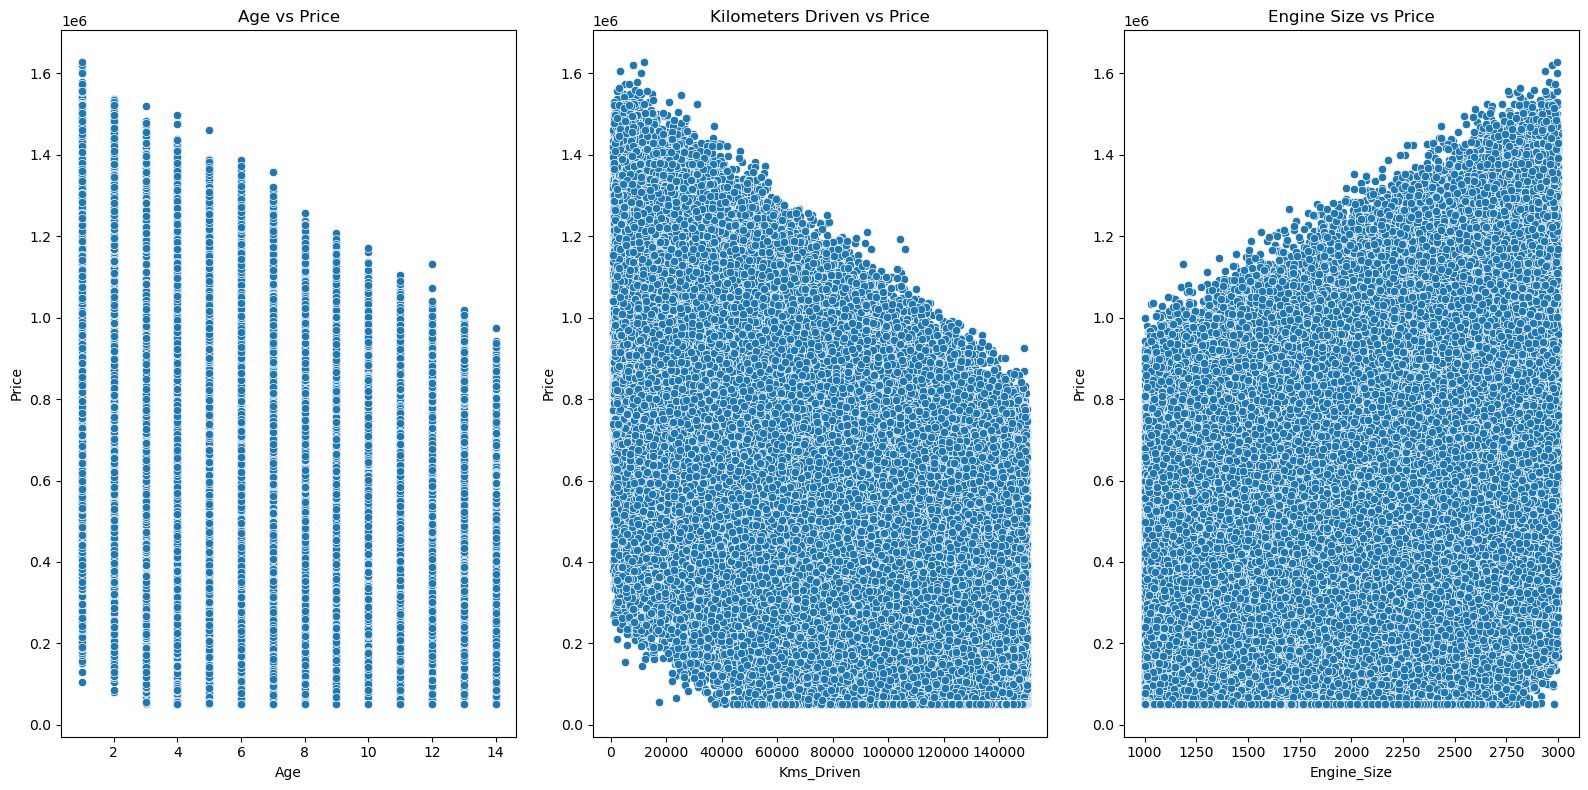

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Individual plots
plt.figure(figsize=(16, 8))

# Age vs Price
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Price', data=data)
plt.title('Age vs Price')

# Kilometers Driven vs Price
plt.subplot(1, 3, 2)
sns.scatterplot(x='Kms_Driven', y='Price', data=data)
plt.title('Kilometers Driven vs Price')

# Engine Size vs Price
plt.subplot(1, 3, 3)
sns.scatterplot(x='Engine_Size', y='Price', data=data)
plt.title('Engine Size vs Price')

plt.tight_layout()
plt.show()

                  Age  Kms_Driven  Engine_Size     Price
Age          1.000000    0.000035    -0.000496 -0.577954
Kms_Driven   0.000035    1.000000    -0.005422 -0.621050
Engine_Size -0.000496   -0.005422     1.000000  0.497929
Price       -0.577954   -0.621050     0.497929  1.000000


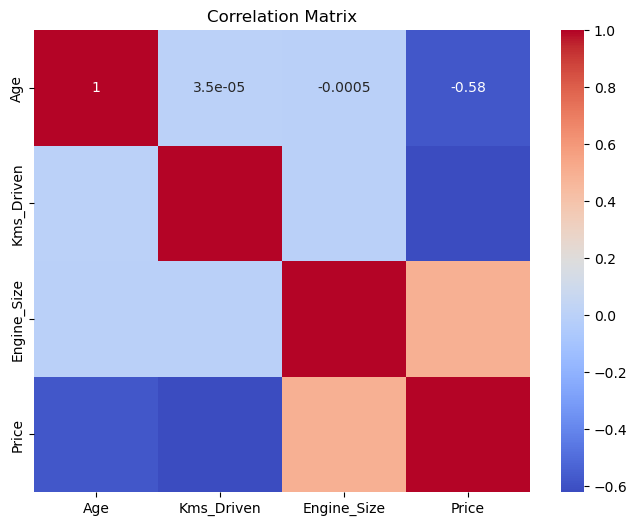

In [8]:
# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Age', 'Kms_Driven', 'Engine_Size']])
X_scaled

array([[ 1.36215675, -1.62842972, -0.18298331],
       [-0.37453809, -1.59004716,  1.50801261],
       [-1.61503441, -0.49721309, -0.80780371],
       ...,
       [-1.61503441, -1.47088001, -0.91857519],
       [-0.37453809, -0.9982309 ,  0.76203591],
       [ 0.61785896, -0.71575202, -0.4547196 ]])

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X = data[['Age', 'Kms_Driven', 'Engine_Size']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
data.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200000, 4), (160000, 3), (40000, 3), (160000,), (40000,))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [12]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_score = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2_score: {r2_score:.2f}')

Mean Absolute Error: 46601.40
Root Mean Squared Error: 61757.52
R2_score: 0.96


In [14]:
import numpy as np

# Make predictions
new_data = np.array([[4, 50000, 1600], [2, 30000, 1800]])
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)

for i, pred in enumerate(predictions):
    print(f'Predicted price for a car with age {new_data[i][0]} years, {new_data[i][1]} km driven, and {new_data[i][2]} cc engine: {pred:.2f} INR')

Predicted price for a car with age 4 years, 50000 km driven, and 1600 cc engine: 730072.45 INR
Predicted price for a car with age 2 years, 30000 km driven, and 1800 cc engine: 973428.57 INR


c:\Users\Balu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
